# Analysis of public attitudes toward vaccination based on Twitter posts from 2006 to 2019

Project carried out as part of postgraduate studies Data Science - algorithms,tools and applications for Big Data problems at the Warsaw University of Technology.

An analysis of public attitudes toward the topic of vaccination was conducted based on a transcript of Twitter posts. The work was carried out in two parts.

### Part 1

The analysis was based on the record of tweets containing the word 'vaccination' from 2006 to 30.11.2019. Data was collected using open source tools, TWINT (https://github.com/twintproject) and a python algorithm.

Data source: https://www.kaggle.com/keplaxo/twitter-vaccination-dataset?select=vaccination2.csv

The script included the following steps:
- data loading and initial analysis - reading the .csv file, initial analysis of the data contained in the file
- preparing data for further analysis - extracting year of tweet publication, converting capital letters to lowercase, removing emoticons, user tags, links and stopwords, stemming
- data analysis - sentiment analysis and analysis of the most frequent hashtags

### Part 2

In part 2, an analogous (truncated) analysis was conducted for a set of tweets regarding Pfizer's COVID-19 vaccine

Data source: https://www.kaggle.com/gpreda/pfizer-vaccine-tweets

In [1]:
import pandas as pd
from tqdm import tqdm 
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords 
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import  Counter

%matplotlib inline

# <b>Part 1</b>

# 1. Data loading and initial analysis
Due to the very large file size, only the columns that will be used for further analysis were loaded into the script.

In [2]:
# Load CSV data
data = pd.read_csv("./data/vaccination.csv", sep = ",", usecols = ['id', 'date', 'tweet', 'hashtags'])

In [3]:
pd.set_option('display.max_colwidth', 1000)
data.head(20)

,id,date,tweet,hashtags
0,1417693.0,20/12/2006,wondering if I'm reacting to a tetanus vaccination.,[]
1,3306733.0,19/01/2007,"Child deaths from measles have fallen by 60% following a massive global vaccination campaign, a study confirms. http://tinyurl.com/ynojsh",[]
2,5042833.0,02/02/2007,"Off to Scar Town Centre to give Ronnie a vaccination shot, and grab some food; at 8pm heading off to IBM with Andy to grab books",[]
3,5232473.0,03/02/2007,@ Tom similar to I want a small pox vaccination because I work at the airport and my kids must have one too but they're not having MMR!,[]
4,5312417.0,04/02/2007,Texas is the first state to require HPV vaccination for 11/12 year olds? Really?,[]
5,5375324.0,08/02/2007,"Still headached, but a wee better since I took some aleve. Blame it to the MMR vaccination yesterday.",[]
6,5546051.0,17/02/2007,"""Polio cases jump in Pakistan as clerics declare vaccination an American plot"" tsk. tsk. Wow these clerics are stupid!",[]
7,5707129.0,26/02/2007,Folding fact #50 1798 Edward Jenner published his book comparing vaccination (intentionally infecting humans with cowpox to induce resistanc,[]
8,8641181.0,16/03/2007,"took Ross for a vaccination, was going to stay downtown for LikeMind.Lec, but having a horrible allergy attack - home for a bath instead",[]
9,9415381.0,19/03/2007,Soldier's 2-year-old son critically ill after infection from father's small pox vaccination. Being given xperimental drug. http://tinyurl.co,[]


In [4]:
data.tail(20)

,id,date,tweet,hashtags
2195088,1.200000e+18,30/11/2019,There has been an increase in vaccination rates for general public since pharmacists have received certified training in order to be able to administer vaccines. It's for sure an added value to a pharmacist @LPharmacists @facfarmaciaUL #ICF2019 #pharmacyleadersofthefuture https://twitter.com/Pharmacy_Times/status/1199754761878138881 …,"['#icf2019', '#pharmacyleadersofthefuture']"
2195089,1.200000e+18,30/11/2019,"If there was a vaccination to take away all of your heterosexual tendencies and desires, would you take it to live a homosexual life? https://twitter.com/chino_blac/status/1199728723962089472 …",[]
2195090,1.200000e+18,30/11/2019,Congratulations to Rwanda. Our e-learning discusses cervical cancer and HPV vaccination. Refresh your knowledge for free #elearning https://horizonmedicaleducation.thinkific.com/courses/Course-2 … https://twitter.com/KulikovUNIATF/status/1200339919379554304 …,['#elearning']
2195091,1.200000e+18,30/11/2019,I want to see vaccination records for your entire family...,[]
2195092,1.200000e+18,30/11/2019,the fact you call it a vaccination should say enough about all dat https://twitter.com/chino_blac/status/1199728723962089472 …,[]
2195093,1.200000e+18,30/11/2019,Everything you need to know about vaccines in one photo. If these psychos support vaccination and support the suppression of anti-vax information there is a reason... And it is not the benefit of humanity. pic.twitter.com/13SSek7WvU,[]
2195094,1.200000e+18,30/11/2019,Many kids who have never had HPV but have been vaccinated for HPV happen to have HPV in their blood. Blindly defending vaccination because some doctor told you it was safe and effective you’re entire childhood is beyond acceptable at this point. Do the work.,[]
2195095,1.200000e+18,30/11/2019,"baby vaccine ''buy the stocks, hide the baby'' the elite pay off doctors to sign off vaccination.",[]
2195096,1.200000e+18,30/11/2019,We report here the case of a child presenting with fever 8 days after vaccination with a measles–mumps–rubella vaccine. This virus was then further genetically characterized as a vaccine-type virus.,[]
2195097,1.200000e+18,30/11/2019,"If there was a vaccination to take away all of your 2D-sexual tendencies and desires, would you take it to live a 3D-sexual life? https://twitter.com/chino_blac/status/1199728723962089472 …",[]


Since there is only 1 tweet published in 2006 in the dataset, and therefore that year is not properly represented, it will be removed so that 2006 is not considered in further analysis

In [5]:
data = data.drop(0)
data.head()

,id,date,tweet,hashtags
1,3306733.0,19/01/2007,"Child deaths from measles have fallen by 60% following a massive global vaccination campaign, a study confirms. http://tinyurl.com/ynojsh",[]
2,5042833.0,02/02/2007,"Off to Scar Town Centre to give Ronnie a vaccination shot, and grab some food; at 8pm heading off to IBM with Andy to grab books",[]
3,5232473.0,03/02/2007,@ Tom similar to I want a small pox vaccination because I work at the airport and my kids must have one too but they're not having MMR!,[]
4,5312417.0,04/02/2007,Texas is the first state to require HPV vaccination for 11/12 year olds? Really?,[]
5,5375324.0,08/02/2007,"Still headached, but a wee better since I took some aleve. Blame it to the MMR vaccination yesterday.",[]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195107 entries, 1 to 2195107
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   id        float64
 1   date      object 
 2   tweet     object 
 3   hashtags  object 
dtypes: float64(1), object(3)
memory usage: 83.7+ MB


There are 2,195,107 tweets in the collection, represented by the values contained in the columns:
- id
- date 
- tweet (contains the text of the tweet)
- hashtags (contains the hashtags used)

There are no missing data in the collection.

# 2. Preparing Data for Analysis 
## 2.1 Cleansing the data

First, the data from the 'date' column will be transformed to a datetime type to allow further analysis of Twitter posts over the years. A 'year' column will also be created, which will contain the year the post was published extracted from the 'date' column.

Next, emoticons, other users' tags (represented by: @UserName) and links will be removed from the 'tweet' column, which contains the text of the tweets. The # symbols will be removed from the hashtags used before. Capital letters will be reduced to lower case. This will be done using the preprocessor function. In the 'hashtags' column, we will also remove the # symbols and brackets and lowercase the hashtags.

The last step is to remove stopwords from the 'tweet_clean' column.

In [7]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)

In [8]:
# Extract year from 'date' column
data['year'] = pd.DatetimeIndex(data['date']).year

In [9]:
def preprocessor(text):
    '''
    Function to clean up data
    '''
    text = text.str.lower()\
    .str.replace('(@[a-z0-9]+)\w+',' ')\
    .str.replace('(http\S+)', ' ')\
    .str.replace('([^0-9a-z \t])',' ')\
    .str.replace(' +',' ')
    return text

In [10]:
# Clean columns 'tweet' and 'hashtags'
data['tweet_clean'] = preprocessor(data['tweet'])
data['hashtags_clean'] = preprocessor(data['hashtags'])

In [11]:
# Load the stopwords list
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lysik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Delete stopwords from 'tweet_clean' column
data['tweet_clean'] = data['tweet_clean'].apply(lambda x: [i for i in x.split() if not i in stop])

In [14]:
data.head(10)

,id,date,tweet,hashtags,year,tweet_clean,hashtags_clean
1,3306733.0,2007-01-19,"Child deaths from measles have fallen by 60% following a massive global vaccination campaign, a study confirms. http://tinyurl.com/ynojsh",[],2007,"[child, deaths, measles, fallen, 60, following, massive, global, vaccination, campaign, study, confirms]",
2,5042833.0,2007-02-02,"Off to Scar Town Centre to give Ronnie a vaccination shot, and grab some food; at 8pm heading off to IBM with Andy to grab books",[],2007,"[scar, town, centre, give, ronnie, vaccination, shot, grab, food, 8pm, heading, ibm, andy, grab, books]",
3,5232473.0,2007-02-03,@ Tom similar to I want a small pox vaccination because I work at the airport and my kids must have one too but they're not having MMR!,[],2007,"[tom, similar, want, small, pox, vaccination, work, airport, kids, must, one, mmr]",
4,5312417.0,2007-02-04,Texas is the first state to require HPV vaccination for 11/12 year olds? Really?,[],2007,"[texas, first, state, require, hpv, vaccination, 11, 12, year, olds, really]",
5,5375324.0,2007-02-08,"Still headached, but a wee better since I took some aleve. Blame it to the MMR vaccination yesterday.",[],2007,"[still, headached, wee, better, since, took, aleve, blame, mmr, vaccination, yesterday]",
6,5546051.0,2007-02-17,"""Polio cases jump in Pakistan as clerics declare vaccination an American plot"" tsk. tsk. Wow these clerics are stupid!",[],2007,"[polio, cases, jump, pakistan, clerics, declare, vaccination, american, plot, tsk, tsk, wow, clerics, stupid]",
7,5707129.0,2007-02-26,Folding fact #50 1798 Edward Jenner published his book comparing vaccination (intentionally infecting humans with cowpox to induce resistanc,[],2007,"[folding, fact, 50, 1798, edward, jenner, published, book, comparing, vaccination, intentionally, infecting, humans, cowpox, induce, resistanc]",
8,8641181.0,2007-03-16,"took Ross for a vaccination, was going to stay downtown for LikeMind.Lec, but having a horrible allergy attack - home for a bath instead",[],2007,"[took, ross, vaccination, going, stay, downtown, likemind, lec, horrible, allergy, attack, home, bath, instead]",
9,9415381.0,2007-03-19,Soldier's 2-year-old son critically ill after infection from father's small pox vaccination. Being given xperimental drug. http://tinyurl.co,[],2007,"[soldier, 2, year, old, son, critically, ill, infection, father, small, pox, vaccination, given, xperimental, drug]",
10,22029401.0,2007-04-08,Boy recuperating from rare infection Tot's condition tied to dad's vaccination http://tinyurl.com/ywg2mb,[],2007,"[boy, recuperating, rare, infection, tot, condition, tied, dad, vaccination]",


## 2.2. Stemming

Next, the process of stemming (reducing words to the form of their cores) will be carried out. Porter's stemmer will be used to perform it.

This operation will be performed on the text of the tweets only, so as to facilitate further sentiment analysis. 

Hashtags, as they are supposed to be a kind of distinctive features and due to the fact that they are often a cluster of several words, will not be stemmed.

In [15]:
# Load Porter's stemmer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [16]:
# Stemming 'tweet_clean' column
data['tweet_stemmed'] = data['tweet_clean'].apply(lambda x: [porter.stem(i) for i in x if i != ''])

In [17]:
data.head()

,id,date,tweet,hashtags,year,tweet_clean,hashtags_clean,tweet_stemmed
1,3306733.0,2007-01-19,"Child deaths from measles have fallen by 60% following a massive global vaccination campaign, a study confirms. http://tinyurl.com/ynojsh",[],2007,"[child, deaths, measles, fallen, 60, following, massive, global, vaccination, campaign, study, confirms]",,"[child, death, measl, fallen, 60, follow, massiv, global, vaccin, campaign, studi, confirm]"
2,5042833.0,2007-02-02,"Off to Scar Town Centre to give Ronnie a vaccination shot, and grab some food; at 8pm heading off to IBM with Andy to grab books",[],2007,"[scar, town, centre, give, ronnie, vaccination, shot, grab, food, 8pm, heading, ibm, andy, grab, books]",,"[scar, town, centr, give, ronni, vaccin, shot, grab, food, 8pm, head, ibm, andi, grab, book]"
3,5232473.0,2007-02-03,@ Tom similar to I want a small pox vaccination because I work at the airport and my kids must have one too but they're not having MMR!,[],2007,"[tom, similar, want, small, pox, vaccination, work, airport, kids, must, one, mmr]",,"[tom, similar, want, small, pox, vaccin, work, airport, kid, must, one, mmr]"
4,5312417.0,2007-02-04,Texas is the first state to require HPV vaccination for 11/12 year olds? Really?,[],2007,"[texas, first, state, require, hpv, vaccination, 11, 12, year, olds, really]",,"[texa, first, state, requir, hpv, vaccin, 11, 12, year, old, realli]"
5,5375324.0,2007-02-08,"Still headached, but a wee better since I took some aleve. Blame it to the MMR vaccination yesterday.",[],2007,"[still, headached, wee, better, since, took, aleve, blame, mmr, vaccination, yesterday]",,"[still, headach, wee, better, sinc, took, alev, blame, mmr, vaccin, yesterday]"


In [18]:
data.tail()

,id,date,tweet,hashtags,year,tweet_clean,hashtags_clean,tweet_stemmed
2195103,1.200000e+18,2019-11-30,Let me do you one better. If there was a vaccination to take away all of your human tendencies and make you a zombie would you take it to live a zombie life? I think this question is that stupid. https://twitter.com/chino_blac/status/1199728723962089472 …,[],2019,"[let, one, better, vaccination, take, away, human, tendencies, make, zombie, would, take, live, zombie, life, think, question, stupid]",,"[let, one, better, vaccin, take, away, human, tendenc, make, zombi, would, take, live, zombi, life, think, question, stupid]"
2195104,1.200000e+18,2019-11-30,La vaccination respecte l'intérêt des individus.,[],2019,"[la, vaccination, respecte, l, int, r, des, individus]",,"[la, vaccin, respect, l, int, r, de, individu]"
2195105,1.200000e+18,2019-11-30,"What really happened when Dr. Andrew Wakefield challenged vaccine safety? Find out in his riveting book, Callous Disregard. https://amzn.to/2LIa0yS",[],2019,"[really, happened, dr, andrew, wakefield, challenged, vaccine, safety, find, riveting, book, callous, disregard]",,"[realli, happen, dr, andrew, wakefield, challeng, vaccin, safeti, find, rivet, book, callou, disregard]"
2195106,1.200000e+18,2019-11-30,She hasn’t had a vaccination in 20+ years either I’m betting but selfishly expects others to load up with them😂 no thanks!,[],2019,"[vaccination, 20, years, either, betting, selfishly, expects, others, load, thanks]",,"[vaccin, 20, year, either, bet, selfishli, expect, other, load, thank]"
2195107,1.200000e+18,2019-11-30,Leading cancer expert dies suddenly following routine yellow fever vaccination https://edition.cnn.com/2019/01/11/health/yellow-fever-vaccination-martin-gore-death-gbr-scli-intl/index.html …,[],2019,"[leading, cancer, expert, dies, suddenly, following, routine, yellow, fever, vaccination]",,"[lead, cancer, expert, die, suddenli, follow, routin, yellow, fever, vaccin]"


After the data preparation process, the following columns were obtained: 
- 'year' - the year a given tweet was published,
- 'tweet_clean' - texts of tweets cleaned of elements such as usernames, links, etc., with stopwords removed,
- 'tweet_stemmed' - tweet texts where occurring words have been reduced to their cores,
- 'hashtags_clean' - hashtags without the # sign.

# 3. Data analysis
## 3.1 Number of posts tagged with #vaccination over the years
We first grouped the data by the year the tweet was published, then counted the number of tweets for that year and presented the data as a graph.

In [19]:
# Group tweets by year
grouped = data.groupby('year')

In [20]:
# Count numbers of tweets by year
no_tweets = grouped['tweet'].count().to_frame()

<function matplotlib.pyplot.show(*args, **kw)>

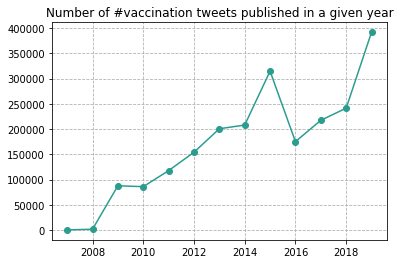

In [21]:
# Plot number of #vaccination tweets published in a given year
plt.plot(no_tweets.index, no_tweets.tweet, '-o', color = '#2A9D8F')
plt.title('Number of #vaccination tweets published in a given year')
plt.grid(b=True, ls = '--')

plt.show

## 3.2 Sentiment Analysis

The Vader Lexicon, dedicated to the analysis of social media data, will be used to perform the sentiment analysis. A sentiment value will be determined for each post, which will then be placed in the 'sentiment_score' column. When using the Vader Lexicon, a sentiment value of 0 indicates a neutral relationship, the higher (concerning positive values) its value, the more positive the nature of the entry is, and the lower (concerning negative values), the more negative the nature of the entry is.

In [22]:
# Load the Vader Lexicon
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lysik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
# Load Sentiment Intensity Analyzer
from nltk.tokenize import word_tokenize
sia = vd.SentimentIntensityAnalyzer()

In [24]:
# Score sentiment of 'tweet_stemmed' column
data['sentiment_score'] = data['tweet_stemmed'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]))

In [25]:
data.head(20)

,id,date,tweet,hashtags,year,tweet_clean,hashtags_clean,tweet_stemmed,sentiment_score
1,3306733.0,2007-01-19,"Child deaths from measles have fallen by 60% following a massive global vaccination campaign, a study confirms. http://tinyurl.com/ynojsh",[],2007,"[child, deaths, measles, fallen, 60, following, massive, global, vaccination, campaign, study, confirms]",,"[child, death, measl, fallen, 60, follow, massiv, global, vaccin, campaign, studi, confirm]",-0.9606
2,5042833.0,2007-02-02,"Off to Scar Town Centre to give Ronnie a vaccination shot, and grab some food; at 8pm heading off to IBM with Andy to grab books",[],2007,"[scar, town, centre, give, ronnie, vaccination, shot, grab, food, 8pm, heading, ibm, andy, grab, books]",,"[scar, town, centr, give, ronni, vaccin, shot, grab, food, 8pm, head, ibm, andi, grab, book]",0.0000
3,5232473.0,2007-02-03,@ Tom similar to I want a small pox vaccination because I work at the airport and my kids must have one too but they're not having MMR!,[],2007,"[tom, similar, want, small, pox, vaccination, work, airport, kids, must, one, mmr]",,"[tom, similar, want, small, pox, vaccin, work, airport, kid, must, one, mmr]",0.0772
4,5312417.0,2007-02-04,Texas is the first state to require HPV vaccination for 11/12 year olds? Really?,[],2007,"[texas, first, state, require, hpv, vaccination, 11, 12, year, olds, really]",,"[texa, first, state, requir, hpv, vaccin, 11, 12, year, old, realli]",0.0000
5,5375324.0,2007-02-08,"Still headached, but a wee better since I took some aleve. Blame it to the MMR vaccination yesterday.",[],2007,"[still, headached, wee, better, since, took, aleve, blame, mmr, vaccination, yesterday]",,"[still, headach, wee, better, sinc, took, alev, blame, mmr, vaccin, yesterday]",0.1004
6,5546051.0,2007-02-17,"""Polio cases jump in Pakistan as clerics declare vaccination an American plot"" tsk. tsk. Wow these clerics are stupid!",[],2007,"[polio, cases, jump, pakistan, clerics, declare, vaccination, american, plot, tsk, tsk, wow, clerics, stupid]",,"[polio, case, jump, pakistan, cleric, declar, vaccin, american, plot, tsk, tsk, wow, cleric, stupid]",0.0592
7,5707129.0,2007-02-26,Folding fact #50 1798 Edward Jenner published his book comparing vaccination (intentionally infecting humans with cowpox to induce resistanc,[],2007,"[folding, fact, 50, 1798, edward, jenner, published, book, comparing, vaccination, intentionally, infecting, humans, cowpox, induce, resistanc]",,"[fold, fact, 50, 1798, edward, jenner, publish, book, compar, vaccin, intent, infect, human, cowpox, induc, resistanc]",0.0000
8,8641181.0,2007-03-16,"took Ross for a vaccination, was going to stay downtown for LikeMind.Lec, but having a horrible allergy attack - home for a bath instead",[],2007,"[took, ross, vaccination, going, stay, downtown, likemind, lec, horrible, allergy, attack, home, bath, instead]",,"[took, ross, vaccin, go, stay, downtown, likemind, lec, horribl, allergi, attack, home, bath, instead]",-0.4767
9,9415381.0,2007-03-19,Soldier's 2-year-old son critically ill after infection from father's small pox vaccination. Being given xperimental drug. http://tinyurl.co,[],2007,"[soldier, 2, year, old, son, critically, ill, infection, father, small, pox, vaccination, given, xperimental, drug]",,"[soldier, 2, year, old, son, critic, ill, infect, father, small, pox, vaccin, given, xperiment, drug]",-0.6947
10,22029401.0,2007-04-08,Boy recuperating from rare infection Tot's condition tied to dad's vaccination http://tinyurl.com/ywg2mb,[],2007,"[boy, recuperating, rare, infection, tot, condition, tied, dad, vaccination]",,"[boy, recuper, rare, infect, tot, condit, tie, dad, vaccin]",0.0000


### Analysis of the obtained sentiment values

The values obtained in the previous section using the Vader Lexicon will be analyzed for incidence over time. 

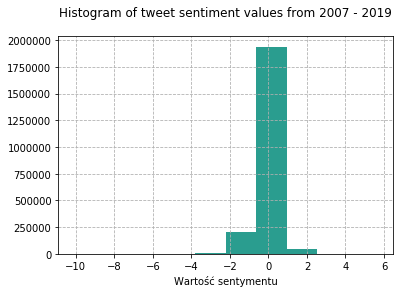

In [26]:
# Plot histogram of tweet sentiment values from 2007 - 2019
plt.hist(data['sentiment_score'], color = '#2A9D8F')
plt.title('Histogram of tweet sentiment values from 2007 - 2019', pad = 20)
plt.xlabel('Wartość sentymentu')
plt.grid(b=True, ls = '--')

plt.show()

he histogram above shows that the general public's opinion on vaccination is neutral.

Let's see which statements received the highest and lowest 'sentiment value'

In [27]:
# Tweet with the highest sentiment value
print(data['sentiment_score'].max())
data[data['sentiment_score'] == data['sentiment_score'].max()]

5.681800000000001


,id,date,tweet,hashtags,year,tweet_clean,hashtags_clean,tweet_stemmed,sentiment_score
2079537,1.160000e+18,2019-08-09,"Very free? But not free to make your own decision about vaccination It sounds like your Masters have ordered you to believe that you are free Keep repeating: I am free I am free I am free I am free I am free I am free I am free I am free Keep going, I didn’t tell you to stop.",[],2019,"[free, free, make, decision, vaccination, sounds, like, masters, ordered, believe, free, keep, repeating, free, free, free, free, free, free, free, free, keep, going, tell, stop]",,"[free, free, make, decis, vaccin, sound, like, master, order, believ, free, keep, repeat, free, free, free, free, free, free, free, free, keep, go, tell, stop]",5.6818


The highest sentiment value for the set of tweets containing the hashtag #vaccination is approximately 5.68. However, in a subjective perception, the content of this tweet may not necessarily be perceived as strongly positive.

In [28]:
# Tweet with the lowest sentiment value
print(data['sentiment_score'].min())
data[data['sentiment_score'] == data['sentiment_score'].min()]

-10.1118


,id,date,tweet,hashtags,year,tweet_clean,hashtags_clean,tweet_stemmed,sentiment_score
2181251,1.200000e+18,2019-11-17,Ban porn Ban sodas Ban cigarettes Ban vaping Ban guns Ban free speech Ban billionaires Ban vaccination Ban the police Ban walls Ban straws Ban prisons Ban laws that stop people craping everywhere Ban all the things not banned yet Ban the bans...live your own lives and STFU,[],2019,"[ban, porn, ban, sodas, ban, cigarettes, ban, vaping, ban, guns, ban, free, speech, ban, billionaires, ban, vaccination, ban, police, ban, walls, ban, straws, ban, prisons, ban, laws, stop, people, craping, everywhere, ban, things, banned, yet, ban, bans, live, lives, stfu]",,"[ban, porn, ban, soda, ban, cigarett, ban, vape, ban, gun, ban, free, speech, ban, billionair, ban, vaccin, ban, polic, ban, wall, ban, straw, ban, prison, ban, law, stop, peopl, crape, everywher, ban, thing, ban, yet, ban, ban, live, live, stfu]",-10.1118


The lowest sentiment value for the set of tweets containing the hashtag #vaccination is about -10.12. The content of this tweet is strongly negative; however, it is not just about vaccines, but many other issues.

### Histograms of sentiment values by year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB91206488>,
      dtype=object)

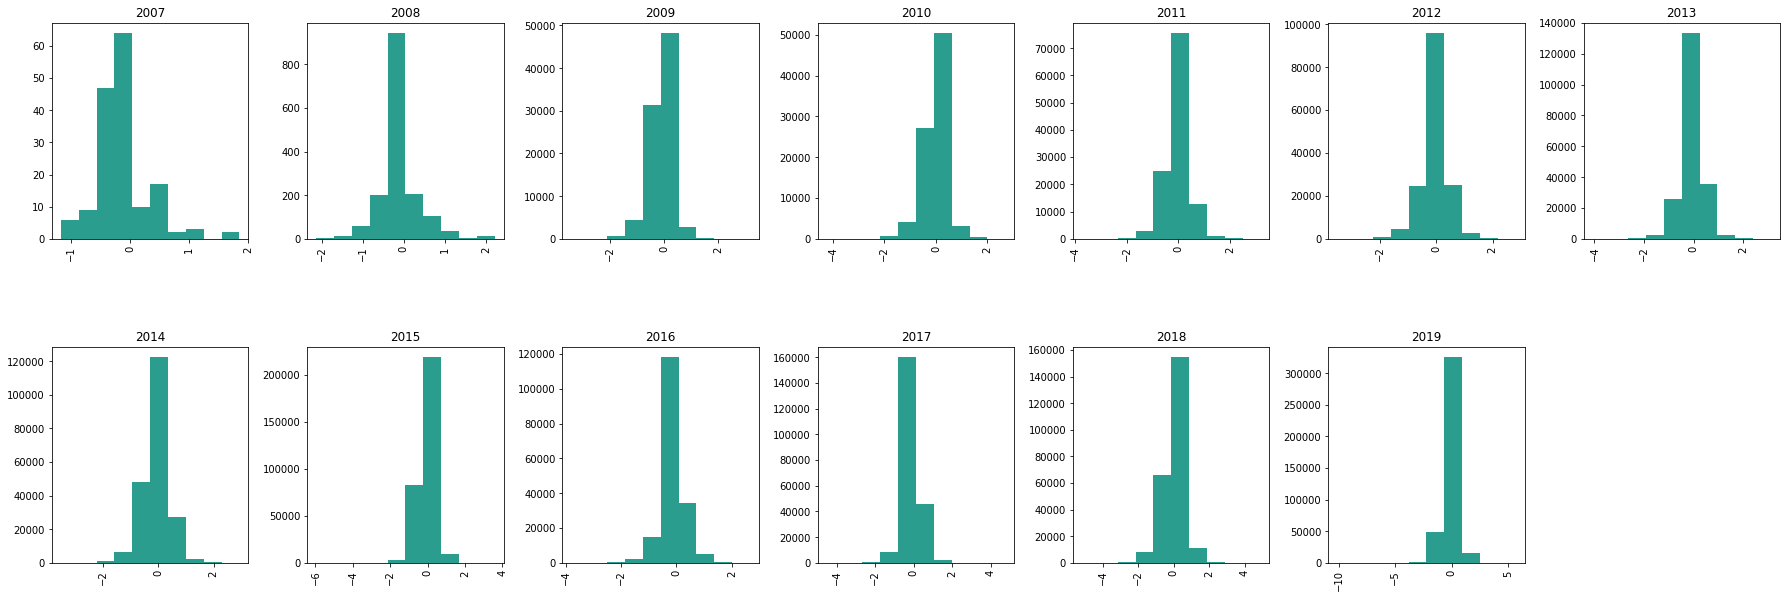

In [29]:
# Histograms of sentiment values by year
data['sentiment_score'].hist(by=data['year'], figsize = (30,10), layout  = (2,7), color = '#2A9D8F', grid = True)

Regardless of the year, the public seems to have a rather neutral attitude towards vaccination. Based on the analysis of Twitter entries, there were no years in which the public was extremely negative or positive about vaccination.

### Analysis of average sentiment values for individual years
For data grouped by year, average sentiment values were calculated and presented in a column chart.

In [30]:
# Count mean sentiment values
sent_m = grouped['sentiment_score'].mean().to_frame()

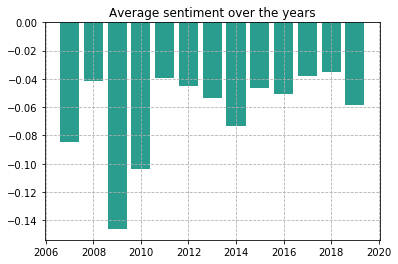

In [31]:
# Plot verage sentiment over the years
plt.bar(sent_m.index, sent_m.sentiment_score, color = '#2A9D8F')
plt.title('Average sentiment over the years')
plt.grid(b=True, ls = '--')

plt.show()

In all analyzed years the average value of sentiment was negative, however, these values are not very low. 

Noteworthy years are: 2007, 2009, 2010 and 2014, in which the average sentiment values are lower than in the other years.

## 3.3 Analysis of hashtags used
### Top 3 hashtags for each year
The top 3 most used hashtags for each year were determined and presented in column charts.

Failed to identify the top 3 most popular hashtags for year  2007


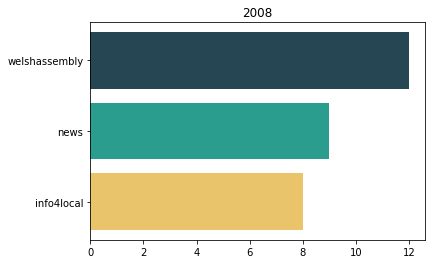

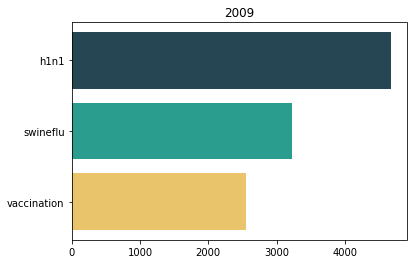

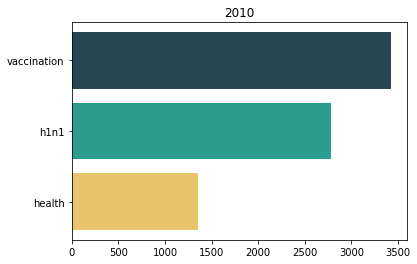

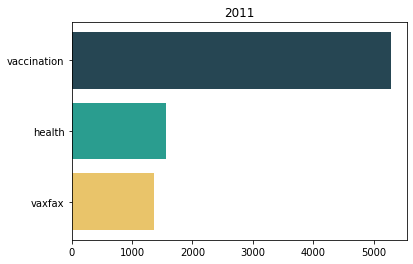

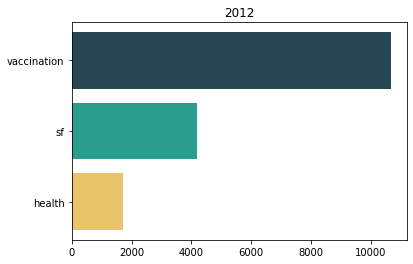

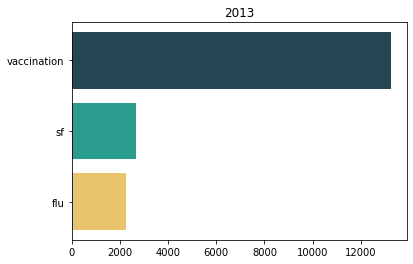

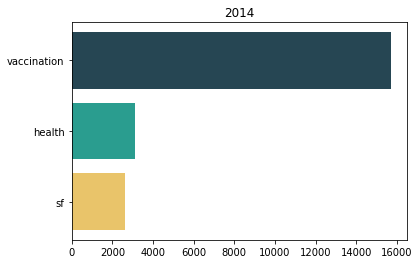

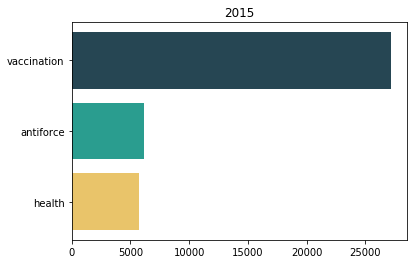

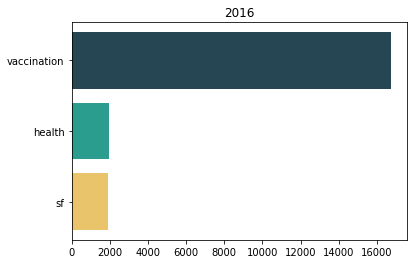

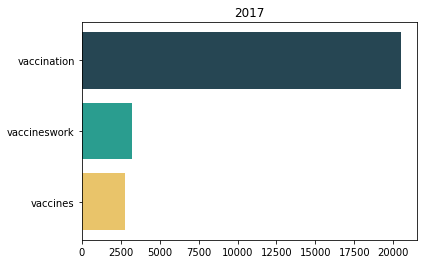

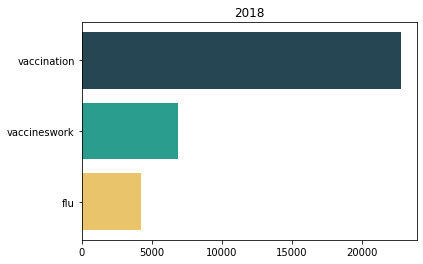

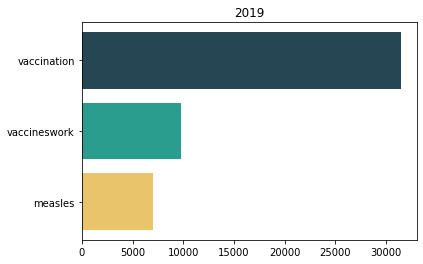

In [32]:
# Plot top 3 hashtags for each year
for name,group in grouped:
    hash_corpus = []
    for x in group['hashtags_clean'].str.split():
        hash_corpus.extend(x)
    hash_counter = Counter(hash_corpus)
    most = hash_counter.most_common()
    if len(most) >= 3:
        x, y = [], []
        for word, count in most[:3]:
            x.append(word)
            y.append(count)
        x.reverse()
        y.reverse()
        plt.barh(x, y, color = ['#E9C46A', '#2A9D8F', '#264653'])
        plt.title(name)
        
        plt.show()
    else:
        print('Failed to identify the top 3 most popular hashtags for year ', name)

For 2007, it was not possible to make a chart of the top 3 hashtags due to the fact that they were not widely used at the time. In 2009 and 2010, some of the most common hashtags were hashtags related to swine flu. During those years, there was an ongoing pandemic of this virus, which may have lowered the average sentiment in those years. In 2014, one of the more common hashtags was #sf. It also refers to swine flu (sf - swine flu). In that year, there were many reports about the possibility of narcolepsy, both after contracting the virus and receiving the vaccine.

### Top 5 hashtags from 2007 - 2019
The 5 most common hashtags were determined

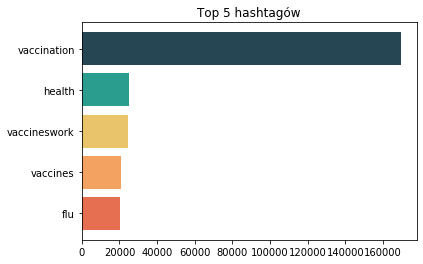

In [33]:
# Plot top 5 hashtags in years 2007 - 2019
hash_corpus = []
for x in data['hashtags_clean'].str.split():
    hash_corpus.extend(x)
hash_counter = Counter(hash_corpus)
most = hash_counter.most_common()
x, y= [], []
for word,count in most[:5]:
    x.append(word)
    y.append(count)
x.reverse()
y.reverse()
plt.barh(x, y, color = ['#E76F51', '#F4A261', '#E9C46A', '#2A9D8F', '#264653'])
plt.title('Top 5 hashtagów')
        
plt.show()

The most commonly used hashtags are not surprising, in addition to hashtags containing the word 'vaccine' there is also #health and #flu, which refers to the flu vaccination, which is one of the more commonly performed.

### Wordcloud

A graphic was generated for the collection showing the most commonly used words (or rather their cores)

In [34]:
# Generate words for wordcloud
wc_string = data['tweet_stemmed'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

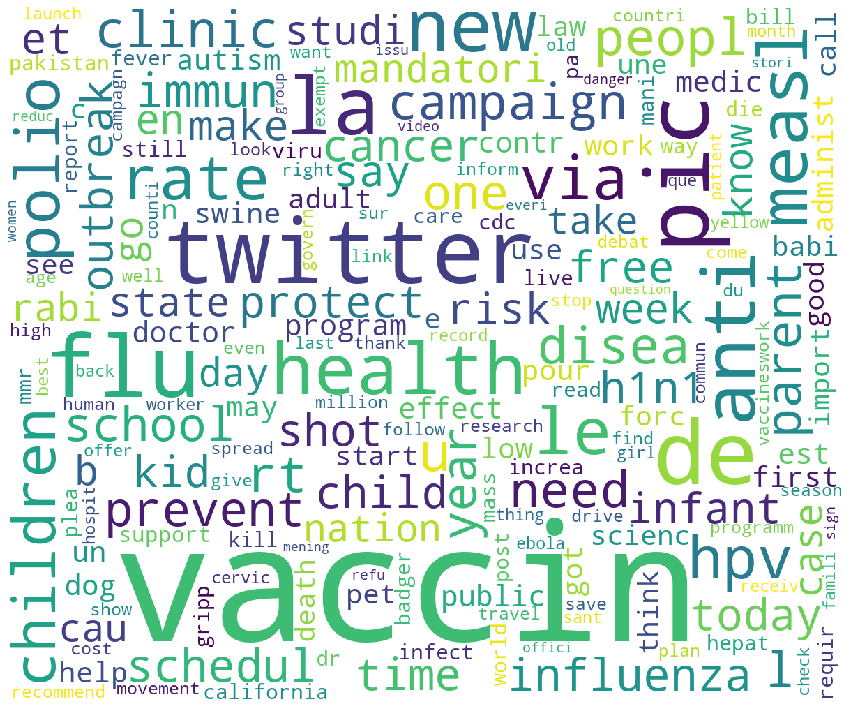

In [35]:
# Generate wordcloud
plt.figure(figsize=(15,15))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(wc_string)
plt.axis('off')
plt.imshow(wordcloud)

# <b>Part 2</b>
### Loading data from a file and its preliminary analysis

In [36]:
# Load the data
pfizer = pd.read_csv("./data/pfizer.csv", sep = ",", usecols = ['id', 'text', 'hashtags'])

In [37]:
pfizer.head()

,id,text,hashtags
0,1340539111971516416,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech']
1,1338158543359250433,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN
2,1337858199140118533,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']"
3,1337855739918835717,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN
4,1337854064604966912,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']"


In [38]:
pfizer.tail()

,id,text,hashtags
2513,1344413371848921088,Very fortunate to have received my first dose of #PfizerBioNTech after a day spent vaccinating at the local hub. Wo… https://t.co/Gc0rz0Qta1,['PfizerBioNTech']
2514,1344408245629235204,So grateful for the 1st dose of the #PfizerBioNTech vaccine. On the same day the #OxfordAstraZeneca vaccine was app… https://t.co/H1CH7joGz6,"['PfizerBioNTech', 'OxfordAstraZeneca']"
2515,1344406586840780812,"#PfizerBioNTech #COVID19 ""There is always a light at the end of the tunnel, but the way out is through.” https://t.co/pF3WqGk0n1","['PfizerBioNTech', 'COVID19']"
2516,1344405690966802433,People in NL tweeting me to say Dutch plan to roll out #AstraZeneca before #PfizerBioNTech because it’s easier to a… https://t.co/Z33psqG4c5,"['AstraZeneca', 'PfizerBioNTech']"
2517,1344404643661684738,"On #vaccines, .@realDonaldTrump did everything right #PfizerBioNTech #PfizerVaccine #modernavaccine #Moderna… https://t.co/hus4f9t00J","['vaccines', 'PfizerBioNTech', 'PfizerVaccine', 'modernavaccine', 'Moderna']"


In [39]:
pfizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2518 non-null   int64 
 1   text      2518 non-null   object
 2   hashtags  1884 non-null   object
dtypes: int64(1), object(2)
memory usage: 59.1+ KB


The 'hashtags' column contains NaN values. These will be filled with the values '[]'.

In [40]:
# Fill NaN
pfizer['hashtags'] = pfizer['hashtags'].fillna('[]')

### Preparing data for analysis

In [41]:
# Clean columns 'text' and 'hashtags'
pfizer['text_clean'] = preprocessor(pfizer['text'])
pfizer['hashtags_clean'] = preprocessor(pfizer['hashtags'])

In [42]:
# Delete stopwords from 'text_clean' column
pfizer['text_clean'] = pfizer['text_clean'].apply(lambda x: [i for i in x.split() if not i in stop])

In [43]:
# Stemming 'text_clean' column
pfizer['text_stemmed'] = pfizer['text_clean'].apply(lambda x: [porter.stem(i) for i in x if i != ''])

In [44]:
# Score sentiment in 'text_stemmed' column
pfizer['sentiment_score'] = pfizer['text_stemmed'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

### Sentiment analysis

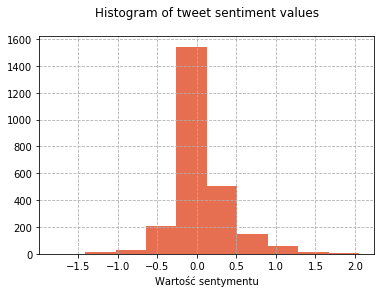

In [45]:
# Plot histogram of tweet sentiment values
plt.hist(pfizer['sentiment_score'], color = '#E76F51')
plt.title('Histogram of tweet sentiment values', pad = 20)
plt.xlabel('Wartość sentymentu')
plt.grid(b=True, ls = '--')

plt.show()

Sentiment score values are clustered around zero. It seems, therefore, that the public is rather neutral towards the new vaccine.

Entry with maximum sentiment value:

In [46]:
# Print tweet with the highest sentiment value
print(pfizer['sentiment_score'].max())
pfizer[pfizer['sentiment_score'] == pfizer['sentiment_score'].max()]

2.0514


,id,text,hashtags,text_clean,hashtags_clean,text_stemmed,sentiment_score
708,1339622618073337856,Day two of #CovidVaccination with #TeamMFT. Great to see so many people starting to smile as hope for a great #2021… https://t.co/Awu927l4CS,"['CovidVaccination', 'TeamMFT']","[day, two, covidvaccination, teammft, great, see, many, people, starting, smile, hope, great, 2021]",covidvaccination teammft,"[day, two, covidvaccin, teammft, great, see, mani, peopl, start, smile, hope, great, 2021]",2.0514


The maximum sentiment value is 2.05. The above tweet actually carries a positive emotional charge regarding the topic of vaccination.

Entry with minimal sentiment value:

In [47]:
# Print tweet with the lowest sentiment value
print(pfizer['sentiment_score'].min())
pfizer[pfizer['sentiment_score'] == pfizer['sentiment_score'].min()]

-1.7982


,id,text,hashtags,text_clean,hashtags_clean,text_stemmed,sentiment_score
1531,1341110152984981504,"89 year old man died of #COVID19 in #Cyprus, raising #pandemic death toll to 96, revised after 4 other deaths were… https://t.co/Pryc1y5m3I","['COVID19', 'Cyprus', 'pandemic']","[89, year, old, man, died, covid19, cyprus, raising, pandemic, death, toll, 96, revised, 4, deaths]",covid19 cyprus pandemic,"[89, year, old, man, die, covid19, cypru, rais, pandem, death, toll, 96, revis, 4, death]",-1.7982


The minimum sentiment value is -1.8. The above tweet has a definite negative tone, however, it is not just on the topic of vaccinations but the pandemic itself.

### Top 5 hashtags

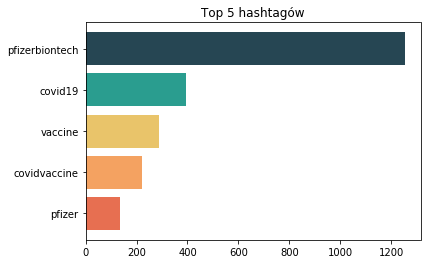

In [48]:
# Plot top 5 hashtags
hash_corpus = []
for x in pfizer['hashtags_clean'].str.split():
    hash_corpus.extend(x)
hash_counter = Counter(hash_corpus)
most = hash_counter.most_common()
x, y= [], []
for word,count in most[:5]:
    x.append(word)
    y.append(count)
x.reverse()
y.reverse()
plt.barh(x, y, color = ['#E76F51', '#F4A261', '#E9C46A', '#2A9D8F', '#264653'])
plt.title('Top 5 hashtagów')

plt.show()

# Summary
Based on an analysis of social media Twitter posts from 2007-2019 (#vaccination) and 2020 (COVID-19 vaccine), the following conclusions can be drawn:
- The public appears to have a neutral attitude toward vaccination (both now and in the past),
- The situation that caused a slight deterioration in the perception of vaccination was the 2009-2010 swine flu pandemic,
- The public appears to have a neutral attitude toward the new vaccines for COVID-19.

# Possibilities for further analysis
- Prepare a model that would allow for more accurate sentiment ratings, in a teacher-led learning process (this would require obtaining sentiment ratings of the collected tweets in advance).
- Sentiment values could be converted into, for example, 3 groups - neutral tweets, positive tweets and negative tweets. This would probably be advisable when presenting the analysis to people unfamiliar with text mining. Numerical values were left in the paper in order to provide as accurate a picture as possible of the public's attitude to the topic of vaccination. 
- Sentiment analysis by the region the user comes from. Do attitudes towards the topic of vaccination in different countries change over time? Are there countries whose citizens have extreme attitudes toward vaccination? Is there a country where attitudes were once negative but are now positive? If so, what caused the change? Can it help to popularize vaccination in countries where public attitudes are currently negative?
- Examine the profile of users who post tweets with negative sentiment values - answering the question of which target audience to target for vaccination popularization.